In [24]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd

In [25]:
## input data = array of all dimensions 
## example of imput data --> [[1,2],[2,1]..] || [[1,2,3],[4,5,6]..]  ... 



def sphere(data):
    data = np.sum(np.power(data, 2))
    return data

def schwefel(data):
    x = np.sin(np.sqrt(np.abs(data)))
    data = 418.9829 * 10 - np.sum(data * x)
    return data

def ackley_03(data):
    x = np.cos(2 * np.pi * data)
    sum = np.sum(np.power(data,2))
    data = -20 * np.exp(-0.2 * np.sqrt((1/10) * sum)) - np.exp((1/10) * np.sum(x)) + 20 + np.exp(1)
    return data

def ackley_03(data):
    x = np.cos(2 * np.pi * data)
    sum = np.sum(np.power(data,2))
    data = -20 * np.exp(-0.2 * np.sqrt((1/10) * sum)) - np.exp((1/10) * np.sum(x)) + 20 + np.exp(1)
    return data

def schwefel_02(data):
    result = []   
    n = len(data[0])
    for i in range(len(data)):
      result.append((418.9829*n) - (np.sum( data[i] * np.sin( np.sqrt( np.abs( data[i] ))))))  
    return result

def schwefel_an(data):
    x = np.sin(np.sqrt(np.abs(data)))
    data = 418.9829 * 10 - np.sum(data * x)
    return data

def sum_squared(data):
    result = []
    for i in range(len(data)):
      n = len(data[i])
      j = np.arange( 1., n+1 )
      result.append(np.sum(j*np.power(data[i],2)))  
    return result

def rastrigin_03(data):
    return 10*sum(np.power(data,2)-10*np.cos(data*2*np.pi))

def rastrigin_an(data):
    result = []
    for i in range(len(data)):
      n = len(data)
      result.append(10*n+sum(np.power(data[i],2)-10*np.cos([val*2*np.pi for val in data])))
    return result

def zakharov(data): 
    result = []
    for i in range(len(data)):
      n = len(data[i])
      j = np.arange( 1., n+1 )
      s2 = sum( j * data[i] ) / 2
      result.append(sum( np.power(data[i],2)) + np.power(s2,2) + np.power(s2,4))
    return result

def local_search_02(fun,lim_up,lim_down,dimension=2,iterations=1000,
                        num_neighbours=100,s_div=0.1):
    points_,generated_val,points_fval = [],[],[] 
    curr_best = start = np.random.uniform(lim_up,lim_down,(1,dimension))
    start_func = fun(start)
    for i in range(iterations):
        generated_val = []
        for j in range(num_neighbours):
            current_test = np.random.normal(curr_best,s_div) 
            while(True):
                if(((current_test>=lim_up).all() and (current_test<=lim_down).all())):
                    generated_val.append(current_test)
                    break
                else:
                    current_test = np.random.normal(curr_best,s_div)
        func_vals=np.array(list(map(fun,generated_val))).tolist()
        minimal_value=min(func_vals)
        if(minimal_value<start_func):
            curr_best = generated_val[func_vals.index(minimal_value)]
            start_func=minimal_value
        points_.append(curr_best)
        points_fval.append(start_func)
    return points_,points_fval

def hill_climber_02(fun,lim_up,lim_down,dimension=2,iterations=1000,
                        num_neighbours=100,s_div=0.1):
    points_,generated_val,points_fval = [],[],[] 
    curr_best = start = np.random.uniform(lim_up,lim_down,(1,dimension))
    start_func = fun(start)
    for i in range(iterations):
        generated_val = []
        for j in range(num_neighbours):
            current_test = np.random.normal(curr_best,s_div) 
            while(True):
                if(((current_test>=lim_up).all() and (current_test<=lim_down).all())):
                    generated_val.append(current_test)
                    break
                else:
                    current_test = np.random.normal(curr_best,s_div)
        func_vals=np.array(list(map(fun,generated_val))).tolist()
        minimal_value=min(func_vals)
        curr_best = generated_val[func_vals.index(minimal_value)]
        start_func=minimal_value
        points_.append(curr_best)
        points_fval.append(start_func)
    return points_,points_fval


In [26]:
def hill_climber_03(n, algorithm, dimensions, max_limit, min_limit, init):
    data = np.empty(0)
    result = []

    for i in range(dimensions):
        data = np.insert(data, i, init)
        data = np.where(data < min_limit, min_limit, data)
        data = np.where(data > max_limit, max_limit, data)

    alg_result = algorithm(data)
    
    for _ in range(n):

        zone_f = np.empty(0)
        
        for i in range(len(data)):
            mu = data[i]
            sig = ((max_limit - min_limit) / 100) * 3
            zone = np.random.normal(mu, sig, 10)
            zone = np.where(zone < min_limit, min_limit, zone)
            zone = np.where(zone > max_limit, max_limit, zone)
            zone_f = np.append(zone_f, zone)    
        data = zone_f

        data_step = np.empty(0)
        
        for dim in range(dimensions):
            data1 = data[dim * 10 : (dim + 1) * 10]
            data2 = np.empty(0)
        
            for i in data1:
                data2 = np.append(data2, algorithm(i))
        
            data_dict = dict(zip(data1,data2))
            step = min(data_dict.items(), key=lambda x: x[1])
            data_step = np.append(data_step, step[0])
        
        data = data_step
        alg_result = algorithm(data)
        result.append(alg_result)

    return result

In [27]:
def local_search_03(n, algorithm, dimensions, max_limit, min_limit, init):
    result = []
    data = np.empty(0)
    
    for i in range(dimensions):
        data = np.insert(data, i, init)
        data = np.where(data < min_limit, min_limit, data)
        data = np.where(data > max_limit, max_limit, data)

    alg_result = algorithm(data)
    for _ in range(n):

        zone_f = np.empty(0)
        
        for i in range(len(data)):
            mu = data[i]
            sig = ((max_limit - min_limit) / 100) * 0.1
            zone = np.random.normal(mu, sig, 9)
            zone = np.insert(zone, 0, mu)
            zone = np.where(zone < min_limit, min_limit, zone)
            zone = np.where(zone > max_limit, max_limit, zone)
            zone_f = np.append(zone_f, zone)
        
        data = zone_f
        data_step = np.empty(0)
        
        for d in range(dimensions):
            data1 = data[d * 10 : (d + 1) * 10]
            data2 = np.empty(0)
            
            for i in data1:
                data2 = np.append(data2, algorithm(i))
            
            data_dict = dict(zip(data1, data2))
            step = min(data_dict.items(), key=lambda x: x[1])
            data_step = np.append(data_step, step[0])
        data = data_step
        
        if (alg_result > algorithm(data)):
            alg_result = algorithm(data)

        result.append(alg_result)
        
    return result

In [44]:
def simulated_annealing(x, dimensions, algorithm, max_limit, min_limit, init):
    alg_result_list = []
    alg_result = np.empty(0)
    data = np.empty(0)

    for i in range(dimensions):
        data = np.insert(data, i, init)
        data = np.where(data < min_limit, min_limit, data)
        data = np.where(data > max_limit, max_limit, data)

    alg_result = algorithm(data)
    
    for i in range(1000):
    
        for _ in range(10):

            zone_f = np.empty(0)
    
            for i in range(len(data)):
                mu = data[i]
                sig = abs((x - 0.7 * i) / 150)
                zone = np.random.normal(mu, sig, 1)
                zone = np.where(zone < min_limit, min_limit, zone)
                zone = np.where(zone > max_limit, max_limit, zone)
                zone_f = np.append(zone_f, zone)

            neighbor = zone_f
            delta_fx = algorithm(neighbor) - algorithm(data)
            
            if (delta_fx < 0):
                data = neighbor
            
            if (algorithm(neighbor) < algorithm(alg_result)):
                alg_result = neighbor
            
            else:
                r = random.uniform(0, 1)
                
                pwr = np.power(np.e, - delta_fx / x)
                if (r < pwr):
                    data = neighbor
        
        alg_result_list.append(algorithm(alg_result))
        x = x - 0.7 * i

    return alg_result_list

In [45]:
schwefel_limits = [-500,500]
rastrigin_limits = [-5.12,5.12]
spehere_limits = [-5.12,5.12]
sum_squared_limits = [-5.12,5.12]
zakharov_limits = [-5,10]
limits_ackley = [32.768, -32.768]


TypeError: simulated_annealing() missing 1 required positional argument: 'init'

In [48]:
hc_schwefell = []
hc_ack = []
hc_sphere = []
ls_schwefel = []
ls_ack = []
ls_sphere = []
sa_schwefell = []
sa_ack = []
sa_sphere = []

for i in range(30):
    sa_schwefell.append(simulated_annealing(700, 10, schwefel, schwefel_limits[0], schwefel_limits[1],50))
    sa_ack.append(simulated_annealing(700, 10, ackley_03, spehere_limits[0], spehere_limits[1], 4.5))
    sa_sphere.append(simulated_annealing(700, 10, sphere, sum_squared_limits[0], sum_squared_limits[1], 4.5))
    hc_schwefell.append(hill_climber_03(1000, schwefel, 10, schwefel_limits[1], schwefel_limits[0], 50))
    hc_ack.append(hill_climber_03(1000, ackley_03, 10, rastrigin_limits[1], rastrigin_limits[0], 25))
    hc_sphere.append(hill_climber_03(1000, sphere, 10, rastrigin_limits[1], rastrigin_limits[0],4.5))
    ls_schwefel=local_search_03(1000, schwefel, 10, schwefel_limits[1], schwefel_limits[0], 50)
    ls_sphere=local_search_03(1000, sphere, 10, rastrigin_limits[1], rastrigin_limits[0],4.5)
    ls_ackley=local_search_03(1000, ackley_03, 10, rastrigin_limits[1], rastrigin_limits[0], 25)


In [54]:
def show_dataframe(fun1,fun2,fun3):

    minimum = np.array([np.min(fun1), np.min(fun2), np.min(fun3)])
    maximum = np.array([np.max(fun1), np.max(hc_schwefell), np.max(sa_schwefell)])
    mean = np.array([np.mean(fun1), np.mean(hc_schwefell), np.mean(sa_schwefell)])
    med = np.array([np.median(fun1), np.median(hc_schwefell), np.median(sa_schwefell)])
    std = np.array([np.std(fun1), np.std(hc_schwefell), np.std(sa_schwefell)])
    labels = np.array(['Local Search', 'Hill Climber', 'Simulated Annealing'])

    data = np.vstack([labels, minimum, maximum, mean, med, std])
    df = pd.DataFrame(data)
    df = df.T
    df.columns = ['Function', 'Min', 'Max', 'Mean', 'Median', 'STD']
    return df  

In [55]:
show_dataframe(ls_schwefel,hc_schwefell,sa_schwefell)

,Function,Min,Max,Mean,Median,STD
0,Local Search,3553.479180502054,3780.839704500452,3554.3647767864027,3553.4791805618534,11.533221302941087
1,Hill Climber,2171.7655646155818,3707.5225809309495,2545.2651727319476,2424.485453086707,358.8119352822717
2,Simulated Annealing,2383.937414686082,2383.937414686082,2383.937414686082,2383.937414686082,0.0


In [56]:
show_dataframe(ls_ackley,hc_ack,sa_ack)

,Function,Min,Max,Mean,Median,STD
0,Local Search,9.641878378818802e-06,13.315832144883807,2.8210529096285413,2.5984290030311996e-05,4.443354904389096
1,Hill Climber,0.037764532016407504,3707.5225809309495,2545.2651727319476,2424.485453086707,358.8119352822717
2,Simulated Annealing,13.274789927055439,2383.937414686082,2383.937414686082,2383.937414686082,0.0


In [57]:
show_dataframe(ls_sphere,hc_sphere,sa_sphere)

,Function,Min,Max,Mean,Median,STD
0,Local Search,5.569851924755336e-11,201.01772467165236,19.690313880700035,9.289422402111745e-10,44.49406848478944
1,Hill Climber,0.0004903828729559222,3707.5225809309495,2545.2651727319476,2424.485453086707,358.8119352822717
2,Simulated Annealing,262.144,2383.937414686082,2383.937414686082,2383.937414686082,0.0


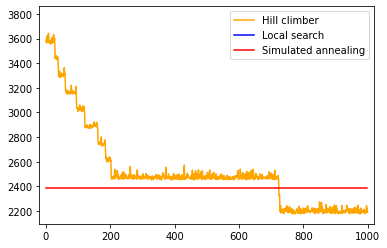

In [59]:
plt.plot(hc_schwefell[0], color = 'orange', label = 'Hill climber')
plt.plot(ls_schwefel[0], color  = 'blue', label = 'Local search')
plt.plot(sa_schwefell[0], color = 'red', label = 'Simulated annealing')
plt.xlim(-20,1020)
plt.legend()
plt.show()

In [ ]:
minimum = np.array([np.min(local_search_with_schwefel_tab), np.min(hill_climber_with_schwefel_tab), np.min(simulated_annealing_with_schwefel_tab)])
maximum = np.array([np.max(local_search_with_schwefel_tab), np.max(hill_climber_with_schwefel_tab), np.max(simulated_annealing_with_schwefel_tab)])
mean = np.array([np.mean(local_search_with_schwefel_tab), np.mean(hill_climber_with_schwefel_tab), np.mean(simulated_annealing_with_schwefel_tab)])
med = np.array([np.median(local_search_with_schwefel_tab), np.median(hill_climber_with_schwefel_tab), np.median(simulated_annealing_with_schwefel_tab)])
std = np.array([np.std(local_search_with_schwefel_tab), np.std(hill_climber_with_schwefel_tab), np.std(simulated_annealing_with_schwefel_tab)])
labels = np.array(['LS', 'HC', 'SA'])

data = np.vstack([labels, minimum, maximum, mean, med, std])
df = pd.DataFrame(data)
df = df.T
df.columns = ['Algorithm', 'Min', 'Max', 'Mean', 'Median', 'STD']
df

In [ ]:
plt.plot(hill_climber_with_schwefel, color = 'orange', label = 'Hill climber')
plt.plot(local_search_with_schwefel, color  = 'blue', label = 'Local search')
plt.plot(simulated_annealing_with_schwefel, color = 'red', label = 'Simulated annealing')
plt.xlim(-20,1020)
plt.legend()
plt.show()

In [ ]:
minimum = np.array([np.min(hill_climber_with_sphere_tab), np.min(local_search_with_sphere_tab), np.min(simulated_annealing_with_sphere_tab)])
maximum = np.array([np.max(hill_climber_with_sphere_tab), np.max(local_search_with_sphere_tab), np.max(simulated_annealing_with_sphere_tab)])
mean = np.array([np.mean(hill_climber_with_sphere_tab), np.mean(local_search_with_sphere_tab), np.mean(simulated_annealing_with_sphere_tab)])
med = np.array([np.median(hill_climber_with_sphere_tab), np.median(local_search_with_sphere_tab), np.median(simulated_annealing_with_sphere_tab)])
std = np.array([np.std(hill_climber_with_sphere_tab), np.std(local_search_with_sphere_tab), np.std(simulated_annealing_with_sphere_tab)])
labels = np.array(['HC', 'LS', 'SA'])

data = np.vstack([labels, minimum, maximum, mean, med, std])
df = pd.DataFrame(data)
df = df.T
df.columns = ['Algorithm','Min','Max','Mean','Median','STD']
df

In [ ]:
plt.plot(hill_climber_with_sphere, color = 'orange', label = 'Hill climber')
plt.plot(local_search_with_sphere, color ='blue', label = 'Local search')
plt.plot(simulated_annealing_with_sphere, color = 'red', label = 'Simulated annealing')
plt.xlim(-20, 1020)
plt.yscale('log',base =10)
plt.legend()
plt.show()

In [ ]:
minimum = np.array([np.min(local_search_with_ackley_tab), np.min(hill_climber_with_ackley_tab), np.min(simulated_annealing_with_ackley_tab)])
maximum = np.array([np.max(local_search_with_ackley_tab), np.max(hill_climber_with_ackley_tab), np.max(simulated_annealing_with_ackley_tab)])
mean = np.array([np.mean(local_search_with_ackley_tab), np.mean(hill_climber_with_ackley_tab), np.mean(simulated_annealing_with_ackley_tab)])
med = np.array([np.median(local_search_with_ackley_tab), np.median(hill_climber_with_ackley_tab), np.median(simulated_annealing_with_ackley_tab)])
std = np.array([np.std(local_search_with_ackley_tab), np.std(hill_climber_with_ackley_tab), np.std(simulated_annealing_with_ackley_tab)])
labels = np.array(['LS','HC','SA'])

data = np.vstack([labels, minimum, maximum, mean, med, std])
df = pd.DataFrame(data)
df = df.T
df.columns = ['Algorithm','Min','Max','Mean','Median','STD']
df

In [ ]:
plt.plot(hill_climber_with_ackley,color = 'orange', label = 'Hill climber')
plt.plot(local_search_with_ackley,color = 'blue', label = 'Local search')
plt.plot(simulated_annealing_with_ackley,color = 'red', label = 'Simulated annealing')
plt.xlim(-20,1020)
plt.legend()
plt.show()